In [34]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from math import pi
from math import sin
from math import cos
from PlotMaker import PlotMaker
from Network import RingNetwork, SimpleContextNetwork, MixedNetwork
from GridSearch import GridSearch

%matplotlib inline

In [2]:
plotmaker = PlotMaker()

## Mixed Network

In [19]:
#### N = 100
N = 100
N_c = 2
C = 1
N_cr = 20
J_cr = 0.01
K_inhib = 0.01
target_indices = np.array([N//2, 0])
network = MixedNetwork(N, N_c, C, K_inhib, N_cr, J_cr, target_indices)
num_steps = 1250
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//5),
    np.linspace(2*pi, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 2*pi, num_steps//5)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
alphas[500:1000,] = 0
input_c = np.zeros(input.size)
input_c[650:800] = 1
input_c[850:950] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

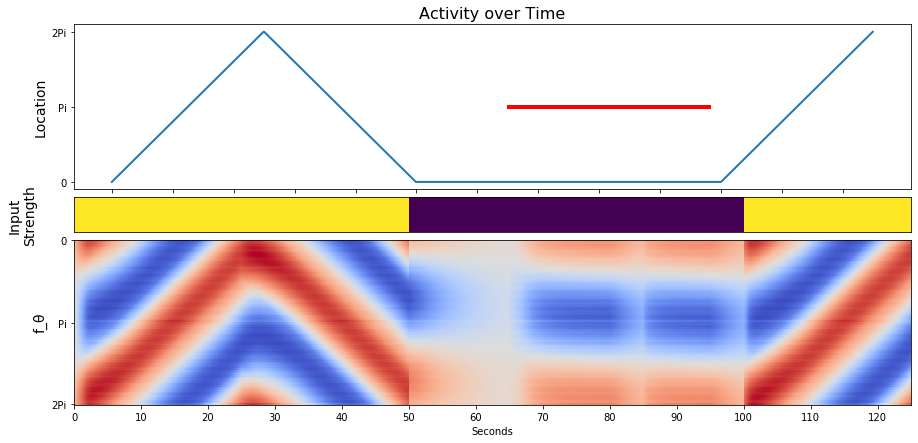

In [20]:
plotmaker.plot_main(
    input, alphas, f, input_c, target_indices/N
    )

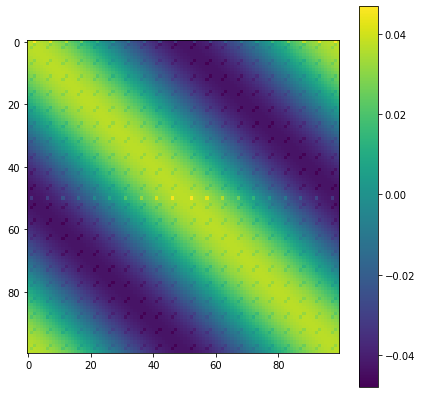

In [22]:
plt.figure(figsize=(7,7))
plt.imshow(network.J)
plt.colorbar()

In [6]:
def _make_ring(network):
    for context in range(2):
        plt.figure(figsize=(3,3))
        target_index = network.target_indices[context]
        seed_units = network.ring_indices[context,:]
        x = []
        y = []
        for seed_unit in seed_units:
            seed_angle = (seed_unit/network.N)*(2*pi)
            x.append(cos(seed_angle))
            y.append(sin(seed_angle))
        target_angle = (target_index/network.N)*(2*pi)
        plt.scatter(x, y, color="blue")
        plt.scatter(
            cos(target_angle), sin(target_angle), color="red"
            )
        plt.xticks([])
        plt.yticks([])
        plt.xlim([-1.1, 1.1])
        plt.ylim([-1.1, 1.1])

In [70]:
origJ = network.J

In [107]:
with open('network.p', 'rb') as f:
    network = pickle.load(f)
w, v = np.linalg.eig(network.J)
# plt.figure()
# plt.plot(w)
# plt.figure()
# plt.plot(v[:,0]*w[0])
# plt.plot(v[:,1]*w[1])
# plt.plot(v[:,0]*w[0] + v[:,1]*w[1])

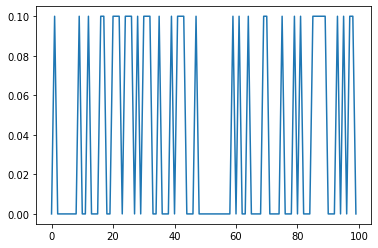

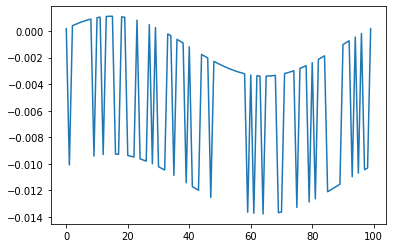

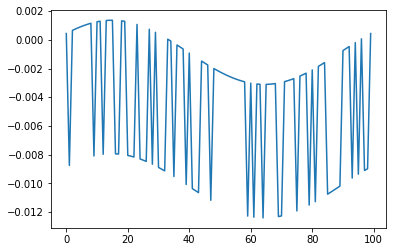

In [108]:
x = np.zeros(100)
x[network.ring_indices.flatten()] = 0.1
plt.figure()
plt.plot(x)
plt.figure()
step1 = 0.1*(-x + network.J@x)
plt.plot(step1)
plt.figure()
plt.plot(step1 + 0.1*(-step1 + network.J@step1))

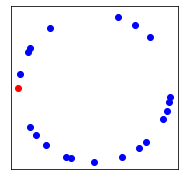

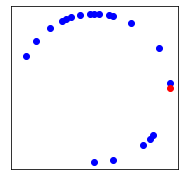

In [109]:
_make_ring(network)